<a href="https://colab.research.google.com/github/brendanpshea/computing_concepts_python/blob/main/IntroCS_12_NeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Voyage Through the History of Neural Networks: From Perceptrons to Transformers
### Computing Concepts With Python | Brendan Shea, PhD (Brendan.Shea@rctc.edu).



In the previous chapter, we discussed two main approaches dominated the field: Good Old-Fashioned AI (GOFAI) and statistical machine learning. GOFAI focuses on symbolic reasoning, using handcrafted rules and logic to simulate intelligent behavior. Statistical machine learning, on the other hand, relies on extracting patterns from data using techniques like Bayesian inference and decision trees.

However, both these approaches have limitations. GOFAI struggles with handling the ambiguity and complexity of real-world situations, while statistical machine learning is limited in its ability to learn rich, hierarchical representations from raw data.

Over the past 60+ years, these issues (among others) have led researchers to seek inspiration from another source: the brain. The human brain, with its intricate network of billions of interconnected neurons, is capable of remarkable feats of perception, reasoning, and creativity. What if we could create artificial neural networks that mimic the brain's structure and function?

### The Quest for the White Whale

Imagine embarking on a quest, like Captain Ahab in Herman Melville's epic novel "Moby-Dick," seeking the elusive white whale of human-level artificial intelligence. Our journey begins with the earliest artificial neural networks and follows their evolution over decades, as researchers pursued the dream of creating machines that can think and learn like humans (and whales, and seagulls).

From simple perceptrons to complex recurrent architectures, the history of neural networks is a story of ingenuity, perseverance, and the tireless pursuit of a revolutionary idea. By drawing inspiration from the brain, researchers have created powerful tools for perception, reasoning, and creativity.

In the following sections, we'll explore the key milestones in this journey, from the birth of the perceptron to the rise of multi-layer networks and the development of recurrent architectures. We'll see how each innovation brought us closer to the white whale of human-level AI, and consider the challenges and opportunities that lie ahead.

Learning outcomes:

1.  Understand the biological inspiration behind artificial neural networks and the basic components of a neuron, including input weights, bias, and activation functions.
2.  Explain the differences between perceptrons, multi-layer perceptrons, and the role of backpropagation in training neural networks to learn complex, non-linear relationships.
3.  Recognize the unique architectures and applications of convolutional neural networks (CNNs) for processing grid-like data and recurrent neural networks (RNNs) for sequential data.
4.  Describe how transformers and attention mechanisms have revolutionized natural language processing and enabled the development of large language models.
5.  Appreciate the potential risks and ethical considerations surrounding advanced AI systems, as illustrated by thought experiments like the paperclip maximizer.


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('6bphH7HCBQg', width=800, height=500)

### Meet BrendyBot

![Brendy Bot Image](https://github.com/brendanpshea/colab-utilities/raw/main/img/brendyBot.jpeg)

BrendyBot is an experimental AI (based on a pretrained Transformer model) trained on the contents of my lecture notes, articles, and books. You can ask it a question here:

https://poe.com/BrendyBot

Sample Questions:
1. What is a Perceptron?
2. What is convolutional network?
3. How do transformers work?

### Biological Neurons: Nature's Computing Devices

To understand the motivation behind artificial neural networks, let's first look at how biological neurons work. A **neuron** is a specialized cell that processes and transmits information through electrical and chemical signals. It consists of a cell body, dendrites that receive input from other neurons, and an axon that sends output to other neurons.

When a neuron receives sufficient input from other neurons, it fires an electrical impulse (called an **action potential**) down its **axon**. This impulse is then converted into a chemical signal at **synapses**, the junctions between neurons, and transmitted to the **dendrites** of the next neuron. Through this process, neurons form complex networks that enable the brain to process information and control behavior.

This neural computation is not unique to humans. Whales, with their large and complex brains, rely on neural networks for navigation, communication, and social behavior. Even simpler creatures like seagulls use neural computation for tasks like visual recognition and motor control.

The key insight behind artificial neural networks is that we can simulate this process in computers. By creating networks of artificial neurons that take input, perform computations, and produce output, we can enable machines to learn and perform intelligent tasks.


### Graphic: The Structure of a Neuron
(From Wikimedia commons)

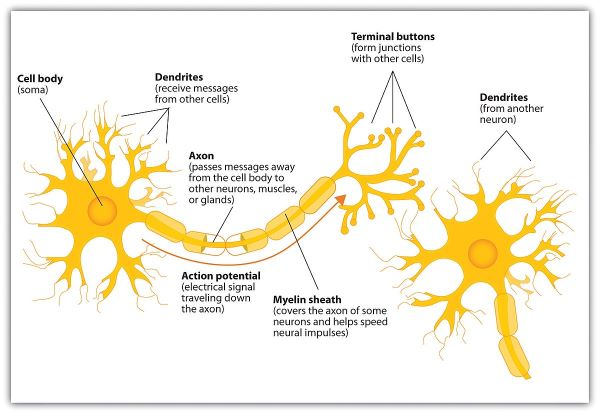



## The Perceptron: The Building Block of Neural Networks

In 1957, at the Cornell Aeronautical Laboratory, Frank Rosenblatt made a breakthrough in artificial intelligence by creating the **perceptron**, a mathematical model inspired by how neurons work in the brain. This invention wasn't just a theoretical advance – Rosenblatt built actual hardware implementations using potentiometers for weights and electric motors for adjustment mechanisms. Just as biological neurons receive signals from other neurons and decide whether to "fire" based on those inputs, a perceptron takes in multiple inputs and produces a yes-or-no decision. This revolutionary idea laid the foundation for modern artificial neural networks and deep learning.

### The Mathematics Behind Perceptrons

A perceptron processes information through a precise mathematical sequence. First, it receives multiple **binary inputs** – signals that can only be 0 or 1, which we typically denote as x₁, x₂, ..., xₙ. Each input is assigned a **weight** (w₁, w₂, ..., wₙ), which can be any real number, positive or negative. These weights represent how important each input is to the final decision.

The perceptron calculates its output using this formula:
```
output = step(w₁x₁ + w₂x₂ + ... + wₙxₙ + b)
```
where b is the **bias**, and step() is the **step function**:
```
step(z) = 1 if z > 0
step(z) = 0 if z ≤ 0
```

The bias acts like a threshold in reverse – rather than comparing the weighted sum to a threshold, we add the bias and compare to zero. This mathematical trick makes the equations cleaner while serving the same purpose.

### Training: How Perceptrons Learn

The true power of perceptrons lies in their ability to learn from examples through a process called **training**. The training algorithm, also developed by Rosenblatt, follows these steps:

1. Start with random weights and bias
2. For each training example:
   - Calculate the perceptron's output
   - Compare it to the desired output
   - If incorrect, adjust weights and bias:
     - For each weight: w_new = w_old + learning_rate × (desired - actual) × input
     - For bias: b_new = b_old + learning_rate × (desired - actual)

The **learning rate** determines how big each adjustment step should be. Too large, and the perceptron might overshoot the correct weights; too small, and training takes too long.

### A Nautical Example: Should the Pequod Go Fishing?

Let's imagine Captain Ahab, before his fateful encounter with Moby Dick, using a perceptron to decide whether conditions are good for whaling. Our perceptron will consider two binary inputs:

1. Weather (x₁): Sunny (1) or Rainy (0)
2. Wind (x₂): Calm (1) or Windy (0)

Through years of experience, Ahab has determined these weights:
- Weather weight (w₁) = 0.6 (sunny weather is quite important)
- Wind weight (w₂) = 0.4 (calm seas are somewhat important)
- Bias = -0.5 (a slight preference toward caution)

Let's examine all possible scenarios:

| Weather | Wind | Calculation | Output | Decision |
|---------|------|-------------|---------|-----------|
| Sunny (1) | Calm (1) | 0.6(1) + 0.4(1) - 0.5 = 0.5 | 1 | Go fishing |
| Sunny (1) | Windy (0) | 0.6(1) + 0.4(0) - 0.5 = 0.1 | 1 | Go fishing |
| Rainy (0) | Calm (1) | 0.6(0) + 0.4(1) - 0.5 = -0.1 | 0 | Stay in port |
| Rainy (0) | Windy (0) | 0.6(0) + 0.4(0) - 0.5 = -0.5 | 0 | Stay in port |

This table shows how the perceptron captures Ahab's decision-making process: he'll brave windy conditions if the sun is shining, but won't risk going out in the rain, even if the seas are calm.

### Limitations and Historical Impact

The limitations of perceptrons became apparent in 1969 when Marvin Minsky and Seymour Papert published their book "Perceptrons," proving that single perceptrons cannot learn certain patterns. The most famous example is the **XOR problem** (exclusive OR), where we want the output to be 1 only if exactly one input is 1:

| Input 1 | Input 2 | Desired Output |
|---------|---------|----------------|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

No matter what weights and bias we choose, a single perceptron cannot correctly classify all these cases. This is because a perceptron can only divide its input space with a single straight line (or hyperplane in higher dimensions), while XOR requires a more complex boundary.

This discovery led to a period known as the "AI winter," where neural network research funding and interest declined sharply. However, researchers later overcame these limitations by combining multiple perceptrons into larger networks with **hidden layers** – leading to the multilayer perceptrons that drove the first wave of neural network research in the 1980s, and ultimately to the deep learning revolution we're experiencing today.

### Modern Applications

While single perceptrons are rarely used alone today, understanding them remains crucial because they are the fundamental building blocks of more complex neural networks. Modern applications still use the same basic principles of weighted inputs and threshold functions, just with many layers of interconnected perceptrons working together. This evolution from simple perceptrons to deep neural networks has enabled breakthroughs in:

- Image and speech recognition
- Natural language processing
- Game playing (like Chess and Go)
- Medical diagnosis
- Weather prediction

The perceptron's journey from a simple binary classifier to a component of sophisticated AI systems shows how fundamental ideas in computer science can evolve and find new applications decades after their initial discovery.

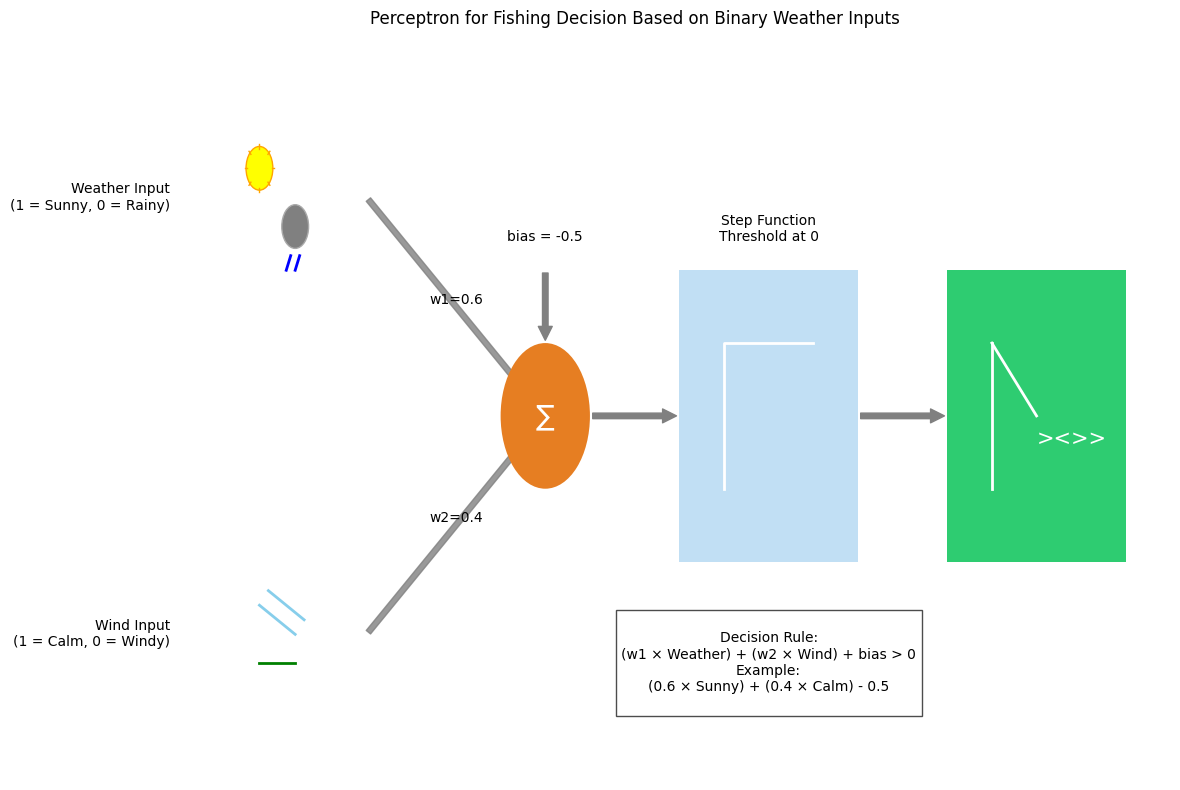

In [7]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch, Rectangle

# Set up the figure
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Define colors
BLUE = '#3498db'
ORANGE = '#e67e22'
GREEN = '#2ecc71'
RED = '#e74c3c'

# Input nodes with binary values
def create_weather_icons(x, y):
    # Sun and rain icons
    circle_sun = Circle((x-0.2, y+0.2), 0.15, facecolor='yellow', edgecolor='orange')
    circle_rain = Circle((x+0.2, y-0.2), 0.15, facecolor='gray', edgecolor='darkgray')
    ax.add_patch(circle_sun)
    ax.add_patch(circle_rain)
    # Rain drops
    plt.plot([x+0.15, x+0.1], [y-0.4, y-0.5], color='blue', linewidth=2)
    plt.plot([x+0.25, x+0.2], [y-0.4, y-0.5], color='blue', linewidth=2)
    # Sun rays
    for i in range(8):
        angle = i * np.pi/4
        dx = 0.15 * np.cos(angle)
        dy = 0.15 * np.sin(angle)
        plt.plot([x-0.2+dx*0.9, x-0.2+dx*1.1],
                [y+0.2+dy*0.9, y+0.2+dy*1.1],
                color='orange', linewidth=1)

def create_wind_icons(x, y):
    # Wind and calm icons
    for i in range(2):  # Wind lines
        plt.plot([x-0.2+i*0.1, x+0.2+i*0.1], [y+0.2+i*0.1, y+i*0.1],
                color='skyblue', linewidth=2)
    plt.plot([x-0.2, x+0.2], [y-0.2, y-0.2], color='green', linewidth=2)  # Calm line

# Create input nodes
create_weather_icons(2, 6)
create_wind_icons(2, 3)

# Add input labels and values
plt.text(0.8, 6, 'Weather Input\n(1 = Sunny, 0 = Rainy)', ha='right', va='center')
plt.text(0.8, 3, 'Wind Input\n(1 = Calm, 0 = Windy)', ha='right', va='center')

# Weights
weights = [0.6, 0.4]  # Example weights
for i, y in enumerate([6, 3]):
    arrow = FancyArrowPatch((3, y), (5, 4.5),
                           arrowstyle='simple',
                           color='gray',
                           alpha=0.8,
                           mutation_scale=20)
    ax.add_patch(arrow)
    mid_x = 4
    mid_y = y + (4.5 - y) * 0.5
    plt.text(mid_x, mid_y, f'w{i+1}={weights[i]}', ha='center', va='bottom')

# Perceptron node
neuron = Circle((5, 4.5), 0.5, facecolor=ORANGE)
ax.add_patch(neuron)
plt.text(5, 4.5, '∑', ha='center', va='center', fontsize=20, color='white')

# Bias
bias_arrow = FancyArrowPatch((5, 5.5), (5, 5),
                            arrowstyle='simple',
                            color='gray',
                            mutation_scale=20)
ax.add_patch(bias_arrow)
plt.text(5, 5.7, 'bias = -0.5', ha='center')

# Activation function visualization
act_box = Rectangle((6.5, 3.5), 2, 2, facecolor=BLUE, alpha=0.3)
ax.add_patch(act_box)
plt.plot([7, 7, 8], [4, 5, 5], color='white', linewidth=2)  # Step function
plt.text(7.5, 5.7, 'Step Function\nThreshold at 0', ha='center')

# Output
output_box = Rectangle((9.5, 3.5), 2, 2, facecolor=GREEN)
ax.add_patch(output_box)
# Add fishing icon
plt.plot([10, 10], [4, 5], color='white', linewidth=2)  # Rod
plt.plot([10, 10.5], [5, 4.5], color='white', linewidth=2)  # Line
fish = plt.text(10.5, 4.3, '><>>', color='white', fontsize=15)

# Add arrow connections
arrow1 = FancyArrowPatch((5.5, 4.5), (6.5, 4.5),
                         arrowstyle='simple',
                         color='gray',
                         mutation_scale=20)
ax.add_patch(arrow1)

arrow2 = FancyArrowPatch((8.5, 4.5), (9.5, 4.5),
                         arrowstyle='simple',
                         color='gray',
                         mutation_scale=20)
ax.add_patch(arrow2)

# Add decision rule explanation
decision_text = """
Decision Rule:
(w1 × Weather) + (w2 × Wind) + bias > 0
Example:
(0.6 × Sunny) + (0.4 × Calm) - 0.5
"""
plt.text(7.5, 2.5, decision_text, ha='center', bbox=dict(facecolor='white', alpha=0.7))

# Set title
plt.title('Perceptron for Fishing Decision Based on Binary Weather Inputs', pad=20)

# Set axis properties
plt.xlim(0, 12)
plt.ylim(2, 7)
plt.axis('off')

plt.tight_layout()

### Code Example: Perceptron
Let's create a simple Python class for a Perceptron that can learn to predict whether a sailor should go fishing based on two inputs: the weather condition and the wind speed. We'll train the Perceptron on a small dataset, deploy it to make predictions, and interpret the output.

In [ ]:
import random

class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.weights = [random.random() for _ in range(2)]
        self.bias = random.random()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        weighted_sum = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias
        return 1 if weighted_sum >= 0 else 0

    def train(self, inputs, target):
        output = self.predict(inputs)
        error = target - output
        self.weights = [w + self.learning_rate * error * x for w, x in zip(self.weights, inputs)]
        self.bias += self.learning_rate * error

# Training data
training_data = [
    ((1, 0), 1),  # (sunny, low wind) -> go fishing
    ((1, 1), 0),  # (sunny, high wind) -> don't go fishing
    ((0, 0), 0),  # (rainy, low wind) -> don't go fishing
    ((0, 1), 0)   # (rainy, high wind) -> don't go fishing
]

# Create a Perceptron
perceptron = Perceptron()

# Train the Perceptron
epochs = 10
for _ in range(epochs):
    for inputs, target in training_data:
        perceptron.train(inputs, target)

# Deploy the Perceptron
while True:
    weather = int(input("Enter the weather condition (1 for sunny, 0 for rainy): "))
    wind = int(input("Enter the wind speed (1 for high, 0 for low): "))

    prediction = perceptron.predict([weather, wind])
    if prediction == 1:
        print("The Perceptron suggests: Go fishing! 🎣")
    else:
        print("The Perceptron suggests: Don't go fishing. ⚓️")

    continue_prediction = input("Do you want to make another prediction? (yes/no): ")
    if continue_prediction.lower() != 'yes':
        break

Enter the weather condition (1 for sunny, 0 for rainy): 1
Enter the wind speed (1 for high, 0 for low): 0
The Perceptron suggests: Go fishing! 🎣
Do you want to make another prediction? (yes/no): no


In this code block:

1.  We define a `Perceptron` class with an `__init__` method that initializes the weights and bias randomly and sets the learning rate.
2.  The `predict` method calculates the weighted sum of the inputs and the bias. If the sum is greater than or equal to 0, it returns 1; otherwise, it returns 0.
3.  The `train` method updates the weights and bias based on the prediction error and the learning rate.
4.  We create a small training dataset where each data point consists of two inputs (weather condition and wind speed) and a target output (1 for go fishing, 0 for don't go fishing).
5.  We instantiate a `Perceptron` object and train it on the training data for a specified number of epochs.
6.  After training, we deploy the Perceptron to make predictions. The user is prompted to enter the weather condition and wind speed, and the Perceptron predicts whether to go fishing or not.
7.  The Perceptron's output is interpreted as a suggestion to either go fishing (output 1) or not go fishing (output 0), displayed with corresponding emojis.
8.  The user can choose to make multiple predictions by entering 'yes' when prompted, or exit the program by entering any other input.

### Exercise
Make a copy of the Perceptron code from above, and see what happens when you do the following:

1.  Modify the `learning_rate` parameter in the `Perceptron` constructor to a different value, e.g., `learning_rate=0.5`.
    -   Run the code and observe how the Perceptron's learning speed and accuracy change with a higher or lower learning rate.
2. Add or remove training examples in the `training_data` list to see how the Perceptron adapts to different scenarios.
    -   Add `((0, 1), 1)` to the `training_data` list to represent a scenario where the sailor goes fishing on a rainy day with high wind speed.
    -   Run the code and notice how the Perceptron's predictions change based on the updated training data.
3.   Change the value of the `epochs` variable to a higher number, e.g., `epochs = 20`.
    -   Run the code and observe how increasing the number of training epochs affects the Perceptron's performance and accuracy.

In [ ]:
# Copy the Perceptron code here

## Multilayer Perceptrons and Backpropagation: Teaching Networks Through Error

While Rosenblatt's perceptron could handle simple decisions, many real-world problems require more sophisticated solutions. The **Multilayer Perceptron (MLP)** emerged as a powerful extension, combining multiple layers of artificial neurons to solve complex problems that single perceptrons couldn't tackle. However, the real breakthrough came in 1986 when Rumelhart, Hinton, and Williams popularized the **backpropagation** algorithm, finally providing an efficient way to train these deeper networks.

### Structure of Multilayer Perceptrons

An MLP consists of at least three types of layers. The **input layer** receives the raw data – in our case, pixel values from handwritten characters. The **hidden layers** (one or more) process this information through successive transformations. Finally, the **output layer** produces the network's prediction. Unlike simple perceptrons, MLPs use continuous **activation functions** like the sigmoid or ReLU (Rectified Linear Unit), allowing them to express confidence levels rather than just yes-or-no decisions.

Each connection between neurons carries a weight, and each neuron has a bias, just like in simple perceptrons. However, the magic of MLPs lies in how these parameters work together across layers to recognize complex patterns. A first layer might detect simple edges and curves, while deeper layers combine these features to recognize entire letters or numbers.

### The Backpropagation Algorithm

Training an MLP is more complex than training a simple perceptron because we need to determine how much each weight contributed to any errors. **Backpropagation** solves this through a clever application of calculus, specifically the chain rule. The algorithm works in four steps:

1. **Forward Pass**: Input data flows through the network, producing a prediction
2. **Error Calculation**: The prediction is compared to the desired output
3. **Backward Pass**: The error is propagated backward through the network
4. **Weight Update**: Each weight is adjusted based on its contribution to the error

The "backward pass" gives the algorithm its name – errors flow backward through the network, assigning blame and making adjustments. This process repeats many times with many examples until the network learns to recognize patterns effectively.

### Character Recognition in the Age of Sail

Imagine Isabel, Ishmael's sister, developing a system to help organize the Pequod's logbooks. Many crew members have different handwriting styles, making it difficult to digitize old records. She decides to create a neural network to recognize handwritten characters.

Her MLP might have:
- An input layer of 784 neurons (28×28 pixel images)
- Two hidden layers of 128 and 64 neurons
- An output layer of 26 neurons (one for each letter)

When processing the first mate's handwritten 'A', the network operates like this:

1. The input layer activates based on the darkness of each pixel
2. The first hidden layer detects basic shapes like straight lines and curves
3. The second hidden layer combines these into more complex features like angles and loops
4. The output layer predicts which letter it's seeing

If the network predicts 'R' instead of 'A', backpropagation begins:

1. The error is calculated (how wrong was 'R' instead of 'A'?)
2. This error flows backward, adjusting weights more strongly in neurons that contributed most to the mistake
3. Weights that helped detect diagonal lines (important for 'A') are strengthened
4. Weights that falsely suggested a curved segment (leading to 'R') are weakened

Through many such examples, the network gradually learns to distinguish different handwriting styles and recognize letters accurately.

### Challenges and Considerations

Training MLPs requires careful consideration of several factors:

1. **Learning Rate**: If too high, the network might overshoot optimal weights; if too low, training takes too long
2. **Network Architecture**: Choosing the number of layers and neurons significantly impacts performance
3. **Overfitting**: The network might memorize training examples instead of learning general patterns
4. **Vanishing Gradients**: In deep networks, error signals can become too weak to be useful

Modern solutions include techniques like dropout (randomly disabling neurons during training), batch normalization (keeping neuron activations in a reasonable range), and better activation functions like ReLU.

### Historical Impact

The development of efficient backpropagation training made neural networks practical for real-world applications. This led to their widespread adoption in:
- Optical character recognition (like Isabel's project)
- Speech recognition
- Image classification
- Language translation
- Medical diagnosis

While modern deep learning uses more sophisticated architectures, the fundamental principles of MLPs and backpropagation remain central to neural network training.

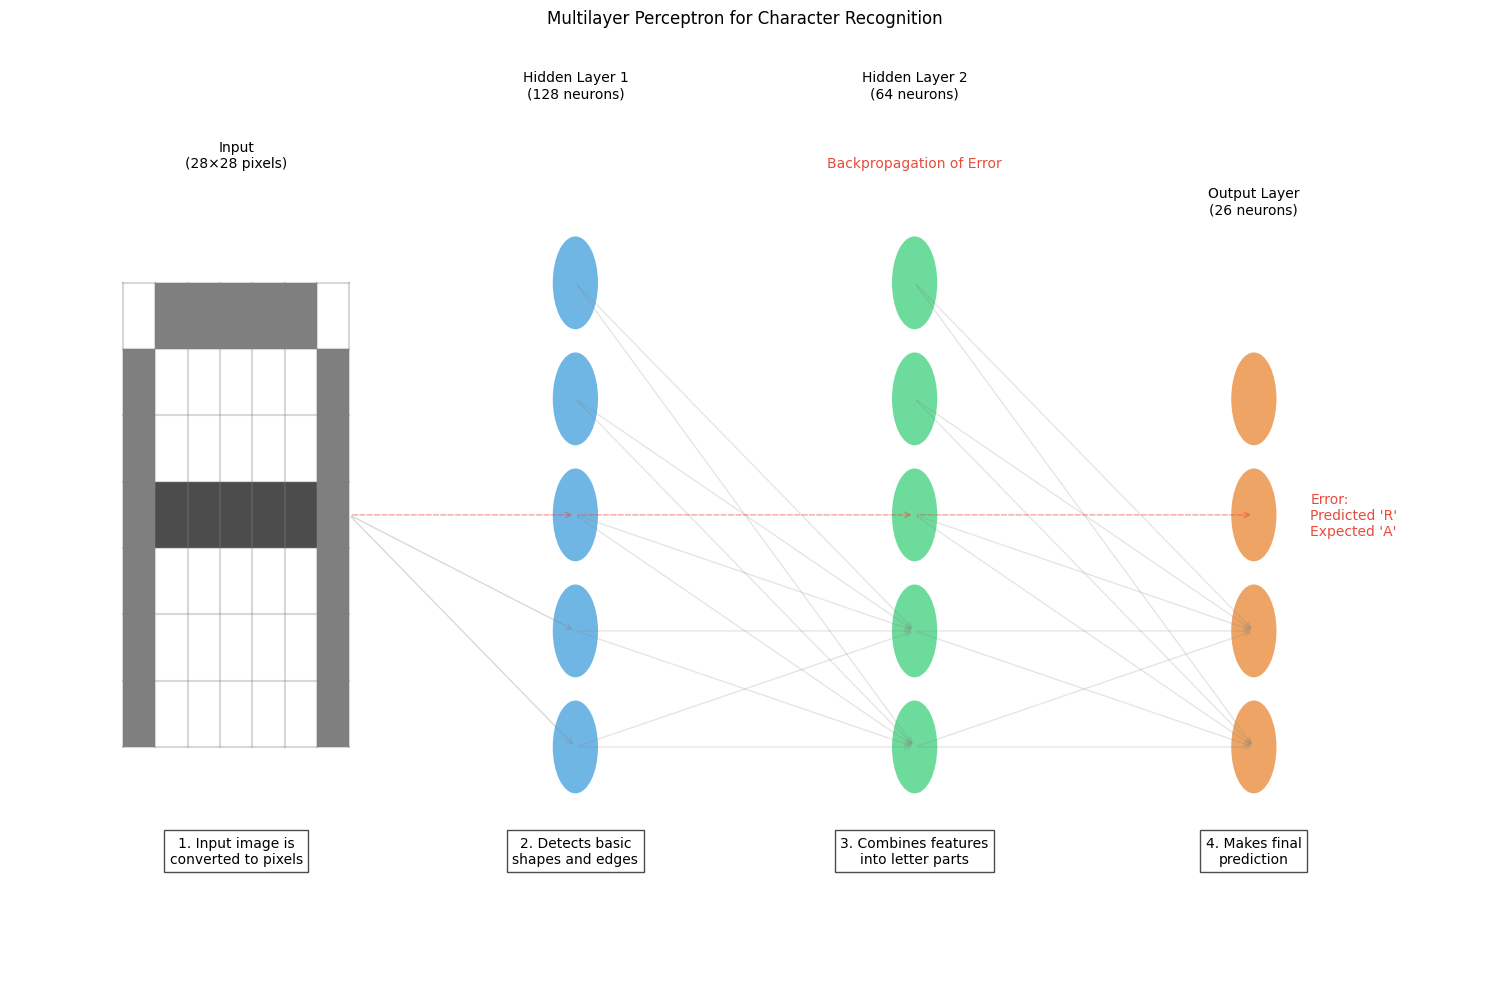

In [8]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, FancyArrowPatch, PathPatch
import matplotlib.path as mpath

# Set up the figure
plt.figure(figsize=(15, 10))
ax = plt.gca()

# Define colors
BLUE = '#3498db'
LIGHT_BLUE = '#85c1e9'
ORANGE = '#e67e22'
GREEN = '#2ecc71'
RED = '#e74c3c'
PURPLE = '#9b59b6'

# Create letter grid (simplified 7x7 "A")
def create_letter_grid(x, y, size=2):
    grid = np.zeros((7, 7))
    # Create an "A" pattern
    grid[1:, 0] = 0.5  # Left vertical
    grid[1:, -1] = 0.5  # Right vertical
    grid[0, 1:-1] = 0.5  # Top horizontal
    grid[3, 1:-1] = 0.7  # Middle horizontal

    pixel_size = size/7
    for i in range(7):
        for j in range(7):
            if grid[i, j] > 0:
                rect = Rectangle((x + j*pixel_size, y + (6-i)*pixel_size),
                               pixel_size, pixel_size,
                               facecolor='black', alpha=grid[i, j])
                ax.add_patch(rect)

    # Add grid
    for i in range(8):
        plt.plot([x + i*pixel_size, x + i*pixel_size],
                [y, y + size], 'gray', alpha=0.3)
        plt.plot([x, x + size],
                [y + i*pixel_size, y + i*pixel_size], 'gray', alpha=0.3)

# Create network layers
def create_layer(x, y, n_neurons, color, layer_name):
    neurons = []
    for i in range(n_neurons):
        neuron = Circle((x, y + i*0.5), 0.2, facecolor=color, alpha=0.7)
        ax.add_patch(neuron)
        neurons.append((x, y + i*0.5))
    plt.text(x, y + n_neurons*0.5 + 0.3, layer_name, ha='center')
    return neurons

# Draw input image
create_letter_grid(1, 2)
plt.text(2, 4.5, "Input\n(28×28 pixels)", ha='center')

# Create layers
hidden1 = create_layer(5, 2, 5, BLUE, "Hidden Layer 1\n(128 neurons)")
hidden2 = create_layer(8, 2, 5, GREEN, "Hidden Layer 2\n(64 neurons)")
output = create_layer(11, 2, 4, ORANGE, "Output Layer\n(26 neurons)")

# Add arrows for forward pass
for h1 in hidden1[:2]:
    ax.add_patch(FancyArrowPatch((3, 3), h1,
                                arrowstyle='->', color='gray', alpha=0.3,
                                mutation_scale=10))

for h1 in hidden1:
    for h2 in hidden2[:2]:
        ax.add_patch(FancyArrowPatch(h1, h2,
                                    arrowstyle='->', color='gray', alpha=0.2,
                                    mutation_scale=10))

for h2 in hidden2:
    for o in output[:2]:
        ax.add_patch(FancyArrowPatch(h2, o,
                                    arrowstyle='->', color='gray', alpha=0.2,
                                    mutation_scale=10))

# Add backpropagation arrows
def create_back_arrow(start, end):
    arrow = FancyArrowPatch(start, end,
                           arrowstyle='<-', color=RED, alpha=0.5,
                           mutation_scale=10, linestyle='--')
    ax.add_patch(arrow)

create_back_arrow((11, 3), (8, 3))
create_back_arrow((8, 3), (5, 3))
create_back_arrow((5, 3), (3, 3))

# Add error calculation
plt.text(11.5, 3, "Error:\nPredicted 'R'\nExpected 'A'",
         ha='left', va='center', color=RED)

# Add explanatory text
plt.text(2, 1.5, "1. Input image is\nconverted to pixels",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(5, 1.5, "2. Detects basic\nshapes and edges",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(8, 1.5, "3. Combines features\ninto letter parts",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(11, 1.5, "4. Makes final\nprediction",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))

# Add backpropagation label
plt.text(8, 4.5, "Backpropagation of Error", color=RED, ha='center')

# Set title
plt.title("Multilayer Perceptron for Character Recognition", pad=20)

# Set axis properties
plt.xlim(0, 13)
plt.ylim(1, 5)
plt.axis('off')

plt.tight_layout()

## Convolutional Neural Networks: Finding Patterns in Images

When Queequeg first joined the Pequod, he was fascinated by the different marine creatures they encountered. Today, if he wanted to automatically identify whales, dolphins, and sharks from photographs, he'd likely use a **Convolutional Neural Network (CNN)**. Developed in the 1980s by Yann LeCun and inspired by studies of the visual cortex in mammals, CNNs have revolutionized computer vision by mimicking how our own brains process visual information.

### Why Regular Neural Networks Fall Short

While multilayer perceptrons can theoretically process images, they have significant practical limitations. Consider a color photograph that's 1000×1000 pixels. Each pixel has three color values (red, green, and blue), meaning we'd need 3 million input neurons! Even worse, this approach ignores a fundamental property of images: nearby pixels are strongly related. A whale's fluke doesn't suddenly appear in random, disconnected pixels – it forms a coherent shape.

### The CNN Revolution

CNNs solve these problems through three key innovations: **convolution layers**, **pooling layers**, and **parameter sharing**. Let's explore how each works.

### Convolution Layers: Pattern Detectors

The term "convolution" comes from mathematics, but the concept is straightforward. Imagine a small flashlight (called a **filter** or **kernel**) sliding across an image. At each position, this flashlight multiplies its pattern with the underlying pixels and adds up the results. Different flashlight patterns detect different features – one might find horizontal lines, another might spot corners, and a third might identify curves.

In our marine life classifier, early convolution layers might detect simple features like the straight edge of a shark's fin or the curved outline of a whale's back. Deeper layers combine these features to recognize more complex patterns like the distinctive shape of a dolphin's snout.

### Pooling Layers: Focusing on What Matters

After finding patterns, CNNs use **pooling layers** to reduce the image size while keeping the important information. The most common approach, **max pooling**, divides the image into small regions (usually 2×2 pixels) and keeps only the strongest signal from each region. This makes the network:
- Less sensitive to exact positions (a whale is still a whale even if it's slightly off-center)
- More efficient (each pooling layer reduces the image size significantly)
- Better at focusing on key features (strong signals tend to be important)

### Putting It All Together

When Queequeg's CNN processes a new photograph, it follows these steps:

1. The image passes through several pairs of convolution and pooling layers, gradually transforming from raw pixels to increasingly sophisticated features
2. Simple patterns (edges, textures) combine into complex shapes (fins, flukes, bodies)
3. The final layers convert these features into probabilities for each class (whale, dolphin, shark)

For example, when shown a photograph of a whale, the network might process it like this:
- First convolution layer: Detects edges and basic textures
- First pooling layer: Simplifies the edge patterns
- Second convolution layer: Finds larger shapes like flukes and fins
- Second pooling layer: Summarizes these shapes
- Third convolution layer: Identifies characteristic whale features
- Final layers: Combines evidence to predict "whale" with high confidence

### Training CNNs

Training a CNN requires many example images with correct labels. During training, the network learns:
- What patterns its filters should detect
- How to combine these patterns to recognize different species
- Which features best distinguish between similar creatures (like dolphins and small whales)

Modern CNNs often have millions of parameters and require specialized hardware (GPUs) for efficient training. However, a technique called **transfer learning** allows us to take a pre-trained network and retrain just the final layers for our specific task, making CNN applications more practical for smaller datasets.

### Beyond Marine Life

While our example focused on marine creatures, CNNs have transformed many fields:
- Medical imaging for disease diagnosis
- Facial recognition for security systems
- Quality control in manufacturing
- Satellite image analysis
- Self-driving car vision systems

### Limitations and Considerations

CNNs, while powerful, aren't perfect. They can be fooled by:
- Unusual angles or lighting conditions
- Partially obscured subjects
- Images very different from their training data
- Intentionally crafted "adversarial" images

Despite these limitations, CNNs remain one of the most successful applications of artificial intelligence, bringing us closer to computers that can see and understand the world as we do.

### Looking Forward

As Queequeg's marine life classifier shows, CNNs have made complex visual tasks accessible to computers. Recent advances like attention mechanisms and transformers are building on CNN foundations to create even more capable vision systems. These technologies would seem like magic to the crew of the Pequod, but they follow principles that even a 19th-century harpooner could understand: look for patterns, combine them into larger patterns, and learn from experience.

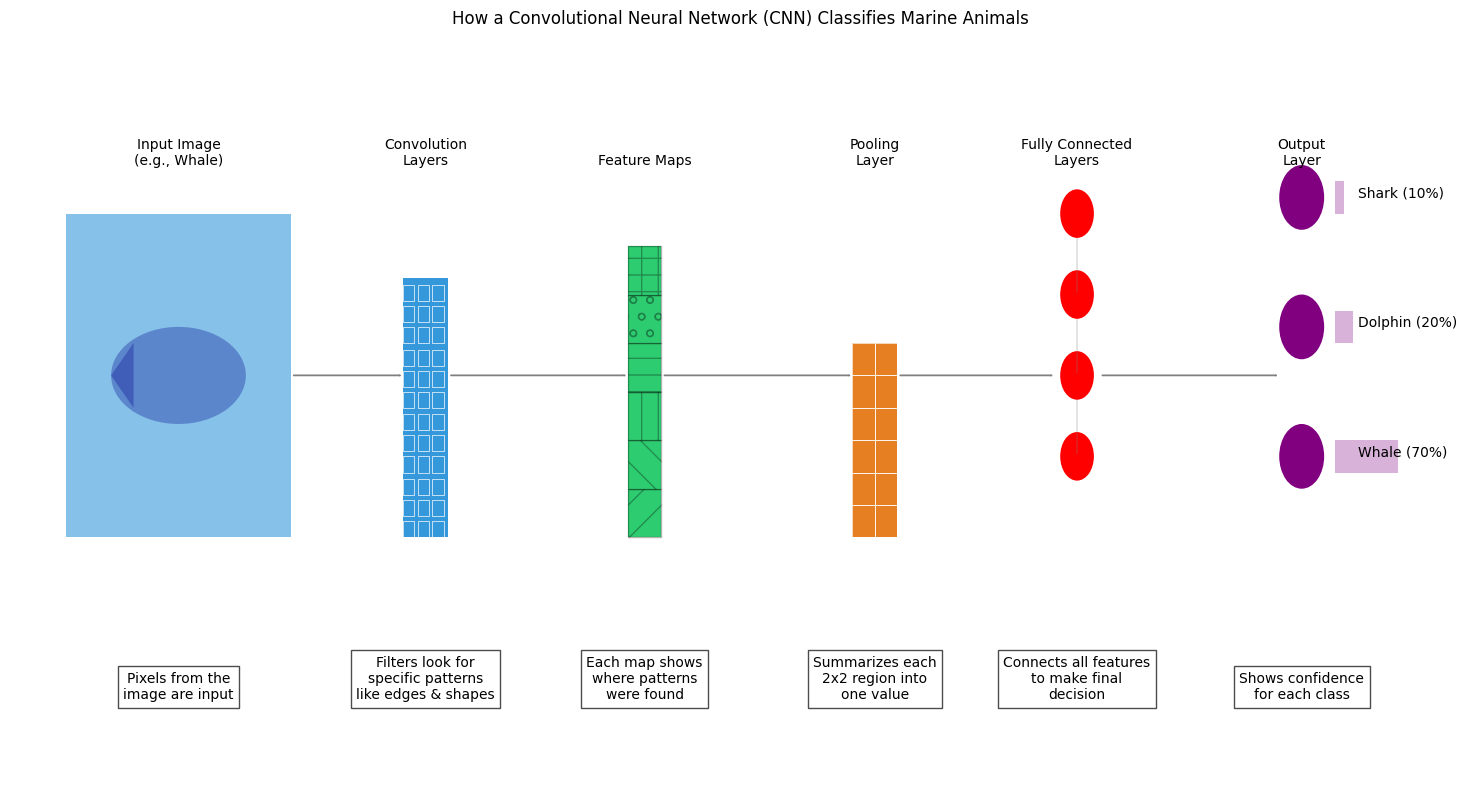

In [3]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, FancyArrowPatch
from matplotlib.path import Path
import matplotlib.patches as patches

# Set up the figure
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Define colors
BLUE = '#3498db'
LIGHT_BLUE = '#85c1e9'
ORANGE = '#e67e22'
GREEN = '#2ecc71'

# Input image - now with a simple whale pattern
input_img = plt.Rectangle((0, 2), 2, 2, facecolor=LIGHT_BLUE)
ax.add_patch(input_img)
# Add simplified whale pattern
whale_body = patches.Ellipse((1, 3), 1.2, 0.6, facecolor='darkblue', alpha=0.3)
whale_tail = patches.Polygon([(0.4, 3), (0.6, 2.8), (0.6, 3.2)], facecolor='darkblue', alpha=0.3)
ax.add_patch(whale_body)
ax.add_patch(whale_tail)
plt.text(1, 4.3, "Input Image\n(e.g., Whale)", ha='center')

# Convolution layers with filter patterns
for i in range(4):
    # Main filter box
    conv = Rectangle((3, 2+0.4*i), 0.4, 0.4, facecolor=BLUE)
    ax.add_patch(conv)
    # Add grid pattern to show filter structure
    for x in range(3):
        for y in range(3):
            ax.add_patch(Rectangle((3 + x*0.13, 2+0.4*i + y*0.13), 0.1, 0.1,
                                 facecolor='none', edgecolor='white', linewidth=0.5))
plt.text(3.2, 4.3, "Convolution\nLayers", ha='center')

# Feature maps with detected patterns
patterns = ['/', '\\', '|', '-', 'o', '+']
for i in range(6):
    fm = Rectangle((5, 2+0.3*i), 0.3, 0.3, facecolor=GREEN)
    ax.add_patch(fm)
    # Add different patterns to each feature map
    ax.add_patch(plt.Rectangle((5, 2+0.3*i), 0.3, 0.3,
                              hatch=patterns[i], fill=False, alpha=0.3))
plt.text(5.15, 4.3, "Feature Maps", ha='center')

# Pooling layer with grid structure
for i in range(3):
    pool = Rectangle((7, 2+0.4*i), 0.4, 0.4, facecolor=ORANGE)
    ax.add_patch(pool)
    # Add grid to show pooling regions
    ax.add_patch(Rectangle((7, 2+0.4*i), 0.2, 0.2, facecolor='none',
                          edgecolor='white', linewidth=0.5))
    ax.add_patch(Rectangle((7.2, 2+0.4*i), 0.2, 0.2, facecolor='none',
                          edgecolor='white', linewidth=0.5))
    ax.add_patch(Rectangle((7, 2.2+0.4*i), 0.2, 0.2, facecolor='none',
                          edgecolor='white', linewidth=0.5))
    ax.add_patch(Rectangle((7.2, 2.2+0.4*i), 0.2, 0.2, facecolor='none',
                          edgecolor='white', linewidth=0.5))
plt.text(7.2, 4.3, "Pooling\nLayer", ha='center')

# Fully connected layers with connections
fc_neurons = [Circle((9, 2.5+0.5*i), 0.15, facecolor='red') for i in range(4)]
for i, neuron in enumerate(fc_neurons):
    ax.add_patch(neuron)
    # Add connection lines between neurons
    if i < 3:
        ax.add_patch(FancyArrowPatch((9, 2.5+0.5*i), (9, 2.5+0.5*(i+1)),
                                    arrowstyle='-', color='gray', alpha=0.3))
plt.text(9, 4.3, "Fully Connected\nLayers", ha='center')

# Output layer with probability bars
output_positions = [(11, 2.5+0.8*i) for i in range(3)]
probabilities = [0.7, 0.2, 0.1]  # Example probabilities
for i, (pos, prob) in enumerate(zip(output_positions, probabilities)):
    # Neuron circle
    ax.add_patch(Circle(pos, 0.2, facecolor='purple'))
    # Probability bar
    ax.add_patch(Rectangle((11.3, pos[1]-0.1), prob*0.8, 0.2,
                          facecolor='purple', alpha=0.3))
    label = ["Whale", "Dolphin", "Shark"][i]
    plt.text(11.5, pos[1], f"{label} ({prob*100:.0f}%)")
plt.text(11, 4.3, "Output\nLayer", ha='center')

# Add arrows between layers
def add_arrow(start, end):
    arrow = FancyArrowPatch(start, end,
                           arrowstyle='simple',
                           color='gray',
                           connectionstyle="arc3,rad=0")
    ax.add_patch(arrow)

# Connect layers with arrows
add_arrow((2, 3), (3, 3))
add_arrow((3.4, 3), (5, 3))
add_arrow((5.3, 3), (7, 3))
add_arrow((7.4, 3), (8.8, 3))
add_arrow((9.2, 3), (10.8, 3))

# Add explanatory text boxes
plt.text(1, 1, "Pixels from the\nimage are input", ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(3.2, 1, "Filters look for\nspecific patterns\nlike edges & shapes", ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(5.15, 1, "Each map shows\nwhere patterns\nwere found", ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(7.2, 1, "Summarizes each\n2x2 region into\none value", ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(9, 1, "Connects all features\nto make final\ndecision", ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(11, 1, "Shows confidence\nfor each class", ha='center', bbox=dict(facecolor='white', alpha=0.7))

# Set axis properties
plt.xlim(-0.5, 12.5)
plt.ylim(0.5, 5)
plt.axis('off')
plt.title("How a Convolutional Neural Network (CNN) Classifies Marine Animals", pad=20)

plt.tight_layout()

## Generative Adversarial Networks: The Art of Digital Creation

When studying whales, Ishmael might sketch what he observes. But imagine if a computer could generate entirely new, realistic images of whales – combining features it has learned from thousands of real whale photographs. This is exactly what **Generative Adversarial Networks (GANs)** do. Invented by Ian Goodfellow in 2014, GANs represent one of the most creative applications of neural networks, building upon the same CNN technology we explored for image classification.

### The Two-Player Game

A GAN consists of two neural networks locked in an artificial competition. The **generator** tries to create fake images, while the **discriminator** tries to distinguish between real and fake images. Think of it like two crew members on the Pequod: one is an artist trying to draw convincing whales, while the other is an experienced whaler checking if the drawings look authentic.

Interestingly, both networks often use CNN architectures, but in different ways. The discriminator works much like Queequeg's marine life classifier from our previous chapter, examining features at different scales to determine if an image is real. The generator, however, uses **transposed convolutions** – essentially running a CNN in reverse to convert abstract features into detailed images.

### How GANs Create Images

The generator starts with **random noise** – imagine throwing paint randomly on a canvas. Through multiple layers of transposed convolutions, it transforms this noise into an image. Just as our CNN classifier found increasingly complex features (edges → shapes → whole creatures), the generator builds images from the opposite direction: abstract concepts → rough shapes → fine details.

The discriminator, meanwhile, uses regular convolutions to learn increasingly sophisticated ways to detect fakes. It might notice that early generated images have unrealistic textures, incorrect proportions, or impossible anatomical features. The generator must then learn to fix these issues to create more convincing images.

Both networks improve through their competition. When the discriminator spots flaws like unrealistic whale skin texture, the generator learns to create more authentic patterns. When the generator masters basic whale anatomy, the discriminator becomes better at spotting subtle inconsistencies in things like the shape of blowholes or the patterns of baleen.

### Beyond Simple Images

Modern GANs can:
- Create images from text descriptions ("a breaching humpback whale at sunset")
- Transform images in specific ways (change summer scenes to winter)
- Generate human faces that don't belong to any real person
- Create artwork in specific styles

However, GANs face important challenges. They can:
- Produce unrealistic artifacts or distortions
- Get stuck generating a limited variety of images
- Require extensive computing power to train
- Raise ethical concerns about fake content

### Impact and Implications

The ability to generate realistic images has profound implications. While GANs enable new forms of artistic expression and aid in fields like drug discovery and astronomy, they also raise concerns about deepfakes and digital manipulation. Like the doubloon nailed to the Pequod's mast, GANs show us that what we see isn't always what it appears to be.

The relationship between GANs and CNNs highlights a fascinating aspect of neural networks: the same basic technology that can understand images can also create them. Just as a skilled whaler learns both to identify different species and to accurately describe them to others, these neural networks can both classify and generate images, showing how closely related these tasks really are.

Understanding GANs helps us appreciate both the capabilities and limitations of artificial creativity, reminding us that even in the age of AI, human judgment and wisdom remain essential.

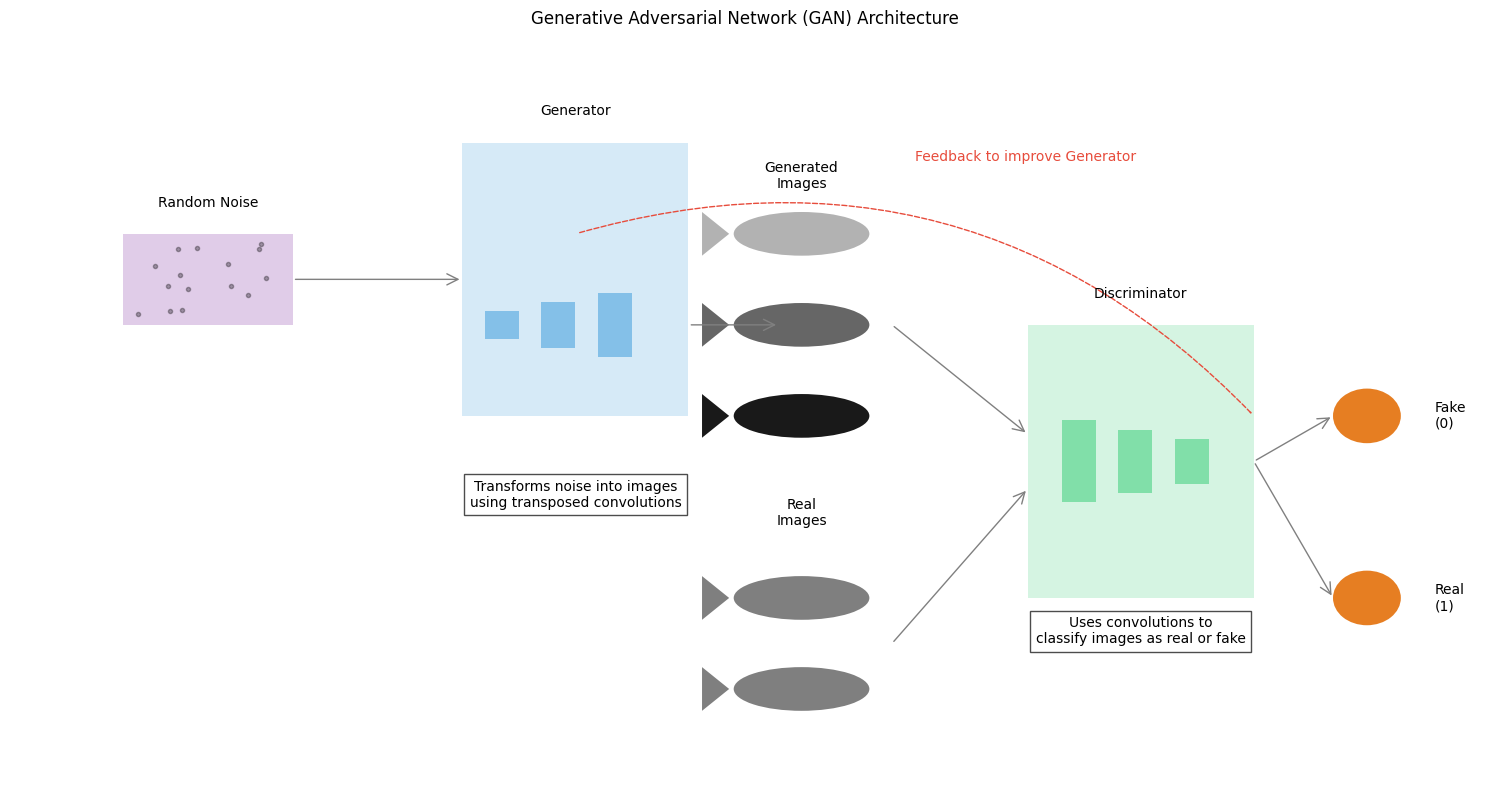

In [9]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, FancyArrowPatch, PathPatch
import matplotlib.patches as patches

# Set up the figure
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Define colors
BLUE = '#3498db'
LIGHT_BLUE = '#85c1e9'
ORANGE = '#e67e22'
GREEN = '#2ecc71'
RED = '#e74c3c'
PURPLE = '#9b59b6'

# Function to create a whale-like shape
def draw_whale(x, y, size=1, color='black', alpha=0.5):
    body = patches.Ellipse((x, y), size*1.5, size*0.6, facecolor=color, alpha=alpha)
    tail = patches.Polygon([[x-size*0.8, y], [x-size*1.1, y+size*0.3],
                          [x-size*1.1, y-size*0.3]], facecolor=color, alpha=alpha)
    ax.add_patch(body)
    ax.add_patch(tail)

# Random noise input
noise_box = Rectangle((1, 5), 1.5, 1, facecolor=PURPLE, alpha=0.3)
ax.add_patch(noise_box)
# Add noise pattern
for i in range(15):
    x = np.random.uniform(1.1, 2.3)
    y = np.random.uniform(5.1, 5.9)
    plt.plot(x, y, 'k.', alpha=0.3)
plt.text(1.75, 6.3, "Random Noise", ha='center')

# Generator Network
gen_box = Rectangle((4, 4), 2, 3, facecolor=BLUE, alpha=0.2)
ax.add_patch(gen_box)
plt.text(5, 7.3, "Generator", ha='center')

# Add generator internals (deconvolution layers)
layer_positions = [(4.2, 5), (4.7, 5), (5.2, 5)]
for i, pos in enumerate(layer_positions):
    size = 0.3 + i * 0.2
    rect = Rectangle((pos[0], pos[1]-size/2), 0.3, size, facecolor=BLUE, alpha=0.5)
    ax.add_patch(rect)

# Generated images with progression
positions = [(7, 6), (7, 5), (7, 4)]
qualities = [0.3, 0.6, 0.9]
for pos, quality in zip(positions, qualities):
    draw_whale(pos[0], pos[1], size=0.8, alpha=quality)
plt.text(7, 6.5, "Generated\nImages", ha='center')

# Real whale images
positions = [(7, 2), (7, 1)]
for pos in positions:
    draw_whale(pos[0], pos[1], size=0.8)
plt.text(7, 2.8, "Real\nImages", ha='center')

# Discriminator Network
disc_box = Rectangle((9, 2), 2, 3, facecolor=GREEN, alpha=0.2)
ax.add_patch(disc_box)
plt.text(10, 5.3, "Discriminator", ha='center')

# Add discriminator internals (convolution layers)
layer_positions = [(9.3, 3.5), (9.8, 3.5), (10.3, 3.5)]
for i, pos in enumerate(layer_positions):
    size = 0.9 - i * 0.2
    rect = Rectangle((pos[0], pos[1]-size/2), 0.3, size, facecolor=GREEN, alpha=0.5)
    ax.add_patch(rect)

# Discriminator output
outputs = [(12, 4), (12, 2)]
labels = ["Fake\n(0)", "Real\n(1)"]
for pos, label in zip(outputs, labels):
    circle = Circle(pos, 0.3, facecolor=ORANGE)
    ax.add_patch(circle)
    plt.text(pos[0]+0.6, pos[1], label, va='center')

# Add arrows
def add_arrow(start, end, color='gray', style='->'):
    arrow = FancyArrowPatch(start, end,
                           arrowstyle=style,
                           color=color,
                           mutation_scale=20)
    ax.add_patch(arrow)

# Forward arrows
add_arrow((2.5, 5.5), (4, 5.5))  # Noise to Generator
add_arrow((6, 5), (6.8, 5))      # Generator to Images
add_arrow((7.8, 5), (9, 3.8))    # Generated Images to Discriminator
add_arrow((7.8, 1.5), (9, 3.2))  # Real Images to Discriminator
add_arrow((11, 3.5), (11.7, 4))  # Discriminator to Fake Output
add_arrow((11, 3.5), (11.7, 2))  # Discriminator to Real Output

# Feedback arrow
feedback_arrow = FancyArrowPatch((11, 4), (5, 6),
                                arrowstyle='<-',
                                color=RED,
                                connectionstyle="arc3,rad=0.3",
                                linestyle='--')
ax.add_patch(feedback_arrow)
plt.text(8, 6.8, "Feedback to improve Generator", color=RED)

# Add explanatory text boxes
plt.text(5, 3, "Transforms noise into images\nusing transposed convolutions",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(10, 1.5, "Uses convolutions to\nclassify images as real or fake",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))

# Set title
plt.title("Generative Adversarial Network (GAN) Architecture", pad=20)

# Set axis properties
plt.xlim(0, 13)
plt.ylim(0, 8)
plt.axis('off')

plt.tight_layout()

### Exercise
Convulutional Neural Networks play a key role in allowing AI image generation. For this exercise, I'd like you to try out THREE DIFFERENT GENERATORS using the same prompt (examples: Midjourney, Bing Image Creator, Google Gemini, etc.). What did you notice about the results?

Free image generator links
1. https://www.bing.com/images/create?FORM=GENILP
2. https://beta.dreamstudio.ai/generate
3. https://poe.com/StableDiffusionXL
4. https://poe.com/Playground-v2.5
5. https://gemini.google.com/app
6. https://www.meta.ai/

In [ ]:
## Lecture, part 2
from IPython.display import YouTubeVideo
YouTubeVideo('_Djf-Szs_-g', width=800, height=500)

## Recurrent Neural Networks: Teaching Computers to Remember

While hunting Moby Dick, the crew of the Pequod came to recognize his distinctive vocalizations. These complex sequences of clicks, whistles, and songs weren't random – they followed patterns that unfolded over time. Recognizing and generating such temporal patterns is where **Recurrent Neural Networks (RNNs)** excel. First developed in the 1980s, RNNs add something crucial that was missing from our previous neural networks: memory.

### The Challenge of Time

Our earlier neural networks treated each input independently. This works well for classifying individual whale photographs, but fails for tasks like understanding whale songs. Why? Because in a sequence of sounds, each note gains meaning from what came before it. Just as a whaler must remember previous sightings to track a whale's migration patterns, a neural network needs memory to understand temporal patterns.

### How RNNs Work

An RNN processes information sequentially, maintaining a **hidden state** that acts as its memory. At each time step, it:
1. Takes in the current input
2. Combines it with its memory of previous inputs
3. Updates its memory
4. Produces an output

Think of it like Ishmael keeping a logbook. Each new observation (input) is interpreted in the context of previous entries (memory), leading to updated understanding (hidden state) and new predictions (output).

### The Power of Memory

In our whale song generator, the RNN might work like this:

1. First click: The network has no context yet, so it just recognizes a basic click pattern
2. Second click: Now it can relate this to the previous sound, noticing patterns
3. Third click: The network begins to recognize typical whale song structures
4. And so on, building up an understanding of the whole sequence

The hidden state captures important features like:
- Rhythm patterns
- Sound combinations that commonly occur together
- Typical song durations
- Transitions between different types of vocalizations

### Training RNNs

Training an RNN involves a technique called **Backpropagation Through Time (BPTT)**. Like regular backpropagation, it adjusts the network's weights based on errors, but it must account for how decisions at one time step affect all future steps.

This creates two significant challenges:

1. **Vanishing Gradients**: Imagine trying to remember every detail from a year-long whaling voyage. Just as humans tend to forget distant events, basic RNNs struggle to learn from long sequences because the training signal gets weaker over time.

2. **Exploding Gradients**: Conversely, sometimes small changes in early sequence steps can have huge effects later on, like a small navigation error leading a ship far off course. This can make training unstable.

### Advanced RNN Architectures

To address these challenges, researchers developed more sophisticated RNN variants:

**Long Short-Term Memory (LSTM)** networks, invented by Hochreiter and Schmidhuber in 1997, add sophisticated gates that control information flow. Like a whaler deciding which observations to record in the logbook, these gates learn to:
- Remember important information for long periods
- Forget irrelevant details
- Update memory when important new information arrives

**Gated Recurrent Units (GRU)** provide a simpler alternative to LSTMs, using fewer gates while maintaining good performance.

### Generating Whale Songs

To generate new whale songs, we could:
1. Train an LSTM on recordings of real whale vocalizations
2. Have it learn the typical patterns and structures
3. Generate new sequences by:
   - Starting with a seed sequence
   - Predicting the next sound
   - Using that prediction to generate the following sound
   - Continuing until we have a complete song

The network learns not just individual sounds, but higher-level structure like:
- Call and response patterns
- Song phrase repetitions
- Gradual changes in pitch or tempo
- Typical song durations

### Beyond Whale Songs

RNNs have transformed many sequence-based tasks:
- Speech recognition and synthesis
- Language translation
- Music composition
- Weather prediction
- Stock market analysis

Any task involving sequences of data can potentially benefit from RNN technology.

### Limitations and Modern Alternatives

While revolutionary, RNNs have limitations:
- They can still struggle with very long sequences
- Training can be slow due to their sequential nature
- They may miss important long-range patterns

Modern alternatives like **Transformers** (which we'll study in the next section) address some of these limitations by processing entire sequences at once using attention mechanisms. However, RNNs remain valuable tools, especially for real-time sequence processing where inputs naturally arrive one at a time.

### Looking Forward

The principles behind RNNs – using memory to understand sequences – represent a crucial step toward more human-like artificial intelligence. Just as Ishmael's tale weaves together past and present to create meaning, RNNs show us how neural networks can capture the temporal patterns that pervade our world.

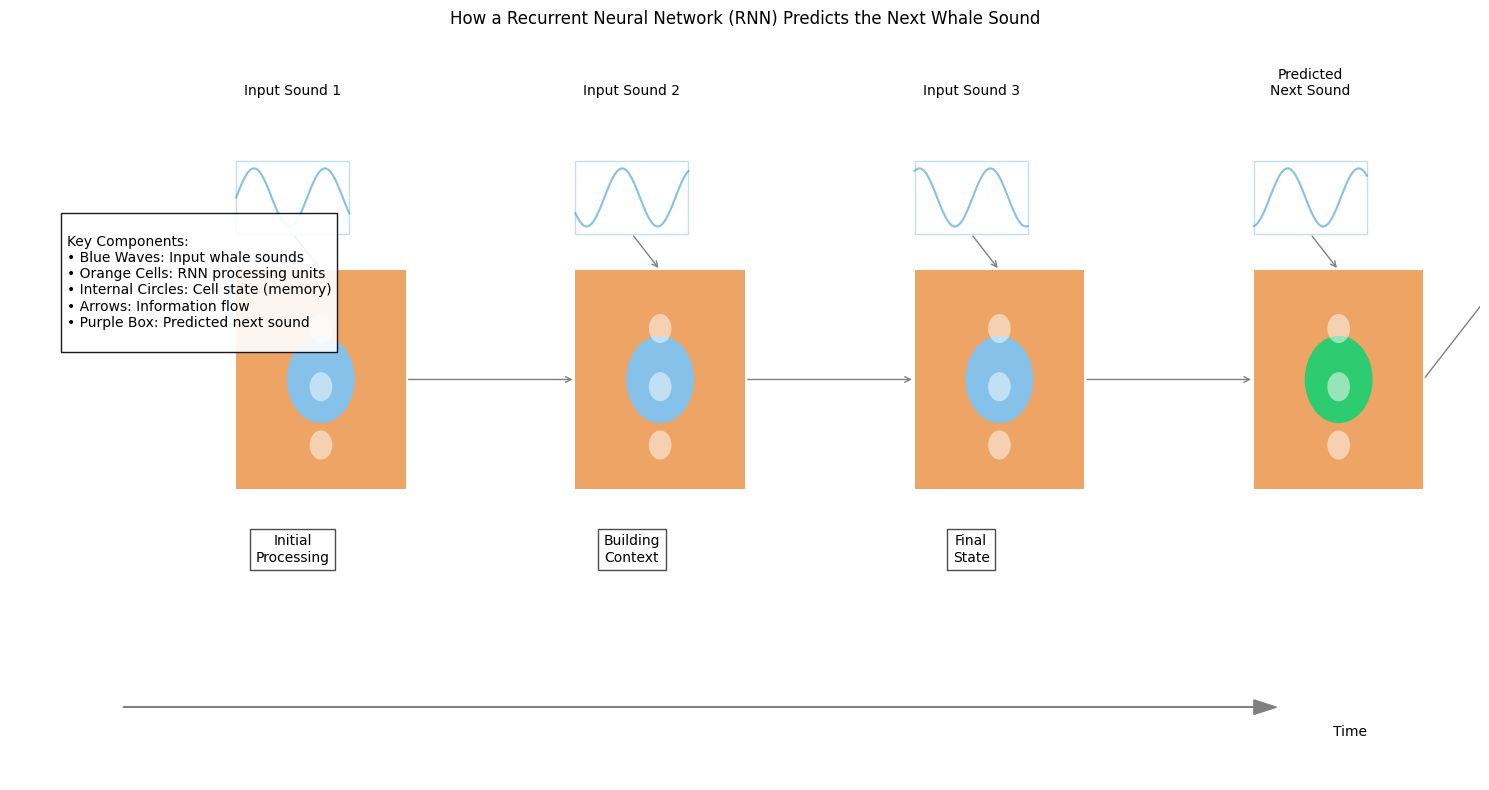

In [5]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, FancyArrowPatch, Arc
import matplotlib.patches as patches

# Set up the figure
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Define colors
BLUE = '#3498db'
LIGHT_BLUE = '#85c1e9'
ORANGE = '#e67e22'
GREEN = '#2ecc71'
PURPLE = '#9b59b6'

# Function to create a cell visualization
def draw_rnn_cell(x, y, state_color):
    # Main cell rectangle
    cell = Rectangle((x, y), 1.5, 1.5, facecolor=ORANGE, alpha=0.7)
    ax.add_patch(cell)

    # Internal state circle
    state = Circle((x+0.75, y+0.75), 0.3, facecolor=state_color)
    ax.add_patch(state)

    # Add some internal structure
    for i in range(3):
        mini_circle = Circle((x+0.75, y+0.3+0.4*i), 0.1, facecolor='white', alpha=0.5)
        ax.add_patch(mini_circle)

# Draw timeline arrow at the bottom
arrow_length = 12
plt.arrow(1, 1, arrow_length-2, 0, head_width=0.1, head_length=0.2, fc='gray', ec='gray')
plt.text(arrow_length, 0.8, "Time", ha='right')

# Input sequences (whale sounds)
for i in range(4):
    x_pos = 2 + i*3
    # Create wave pattern for current input
    x = np.linspace(0, 1, 50)
    y = 0.2 * np.sin(10 * (x + i)) + 4.5
    plt.plot(x + x_pos, y, color=BLUE, alpha=0.6)

    # Add box around wave
    ax.add_patch(Rectangle((x_pos, 4.25), 1, 0.5,
                          facecolor='none', edgecolor=BLUE, alpha=0.3))

    # Draw RNN cell
    draw_rnn_cell(x_pos, 2.5, LIGHT_BLUE if i < 3 else GREEN)

    # Add arrows
    # Input to cell
    add_arrow = lambda start, end: ax.add_patch(
        FancyArrowPatch(start, end, arrowstyle='->', color='gray', mutation_scale=10))

    add_arrow((x_pos+0.5, 4.25), (x_pos+0.75, 4))

    # Previous to current cell (except for first cell)
    if i > 0:
        add_arrow((x_pos-1.5, 3.25), (x_pos, 3.25))

    # Current state to output
    if i == 3:  # Last cell
        # Prediction output
        pred_box = Rectangle((x_pos+2, 4.25), 1, 0.5, facecolor=PURPLE, alpha=0.7)
        ax.add_patch(pred_box)
        x_pred = np.linspace(0, 1, 50)
        y_pred = 0.2 * np.sin(10 * (x_pred + 4)) + 4.5
        plt.plot(x_pred + x_pos+2, y_pred, color='white', linewidth=2)
        plt.fill_between(x_pred + x_pos+2, y_pred-0.1, y_pred+0.1, color='white', alpha=0.2)
        add_arrow((x_pos+1.5, 3.25), (x_pos+2.5, 4.25))

# Add labels
plt.text(2.5, 5.2, "Input Sound 1", ha='center')
plt.text(5.5, 5.2, "Input Sound 2", ha='center')
plt.text(8.5, 5.2, "Input Sound 3", ha='center')
plt.text(11.5, 5.2, "Predicted\nNext Sound", ha='center')

# Add explanatory text boxes
plt.text(2.5, 2, "Initial\nProcessing", ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(5.5, 2, "Building\nContext", ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(8.5, 2, "Final\nState", ha='center', bbox=dict(facecolor='white', alpha=0.7))

# Main title
plt.title("How a Recurrent Neural Network (RNN) Predicts the Next Whale Sound", pad=20)

# Add legend-like information box
info_text = """
Key Components:
• Blue Waves: Input whale sounds
• Orange Cells: RNN processing units
• Internal Circles: Cell state (memory)
• Arrows: Information flow
• Purple Box: Predicted next sound
"""
plt.text(0.5, 3.5, info_text, ha='left', bbox=dict(facecolor='white', alpha=0.9))

# Set axis properties
plt.xlim(0, 13)
plt.ylim(0.5, 5.5)
plt.axis('off')

plt.tight_layout()

## Transformers: Attention Changes Everything

Imagine if Ishmael could instantly connect any moment in his tale to any other relevant moment, without having to read through the entire story sequentially. This is essentially what **Transformers** achieve with their revolutionary **attention mechanism**. Introduced in 2017 by Google researchers in their paper "Attention is All You Need," Transformers solved fundamental limitations of earlier networks, dramatically advancing artificial intelligence's ability to process sequences.

### The Power of Attention

While our RNNs could generate whale songs by processing sounds one at a time, Transformers work differently. Consider how Queequeg might analyze whale vocalizations: rather than remembering the entire sequence of sounds in order, he might notice that certain clicks often predict certain whistles, or that specific call patterns typically signal the start of a longer song. Even if these related sounds are far apart in time, their connection is important.

Transformers capture these relationships through **self-attention**. Unlike RNNs, which maintain a single memory state, Transformers let each part of a sequence directly interact with every other part. When processing a whale's song, a Transformer can simultaneously:
- Connect similar sound patterns that occur far apart in time
- Identify which previous sounds are most relevant for predicting the next one
- Recognize overall structure without having to process the sequence step by step

The self-attention mechanism assigns weights to these connections – like our harpooner noting that certain sounds in a whale's song are strongly related to others, even if they're separated by many other vocalizations. This means that when predicting the next sound in a sequence, the model can focus on all relevant previous sounds, regardless of how long ago they occurred.

The mathematics behind attention involves calculating similarity scores between elements, but we can think of it like creating a map of relationships. For each sound in our whale song, we draw connections to all other sounds, with stronger lines representing stronger relationships. These connections help the model understand both local patterns (like common two-sound combinations) and global structure (like the overall composition of a song).

Key advantages of this approach include:
- No vanishing gradient problems (since every position connects directly to every other position)
- Parallel processing (the entire sequence can be analyzed at once)
- Better handling of long-range dependencies (relationships between distant elements)
- More interpretable results (we can actually visualize which parts of the input are being used for predictions)

### Building Better Models

Modern Transformers typically stack multiple layers of attention, each followed by a feed-forward neural network. Each layer can learn different types of relationships – some might focus on short-term patterns while others capture broader structure. They also use something called **positional encoding** to keep track of where each element appears in the sequence, since the attention mechanism itself doesn't know about order.

In our whale song example, a modern Transformer might use:
- Early layers to identify basic sound patterns and common transitions
- Middle layers to recognize longer phrases and repeated motifs
- Later layers to understand overall song structure and predict appropriate continuations

The model can then generate new whale songs by repeatedly predicting the next sound in a sequence, using attention to consider all relevant context from previous sounds. Unlike RNN generation, which can sometimes lose track of long-term structure, Transformers maintain coherent patterns even over long sequences.

### Impact and Applications

The success of Transformers has revolutionized many fields beyond audio processing. They power modern language models (like GPT and BERT), enhance machine translation, improve protein structure prediction, and advance music composition. Their ability to handle long sequences while maintaining coherent structure makes them particularly valuable for tasks requiring understanding of complex patterns.

However, Transformers face their own challenges. Processing long sequences requires significant computational resources, as the number of attention connections grows quadratically with sequence length. Imagine trying to draw connection lines between every pair of sounds in a day-long whale song – the number of lines would be enormous! Researchers continue developing more efficient variants to address these limitations.

The principles behind Transformers – particularly the idea that distant elements in a sequence can directly influence each other – have profoundly impacted artificial intelligence. Just as the crew of the Pequod learned to understand whales by observing patterns in their behavior across vast oceans and long time spans, Transformers show us the importance of considering all available context when trying to understand or generate sequential patterns.

Looking ahead, Transformers and attention mechanisms continue evolving, finding new applications and becoming more efficient. They remind us that sometimes the best way to understand complex patterns isn't to process them step by step, but to consider all the relationships at once – much like how Ishmael's tale gains its power not just from its sequential narrative, but from how each moment connects to others throughout the story.

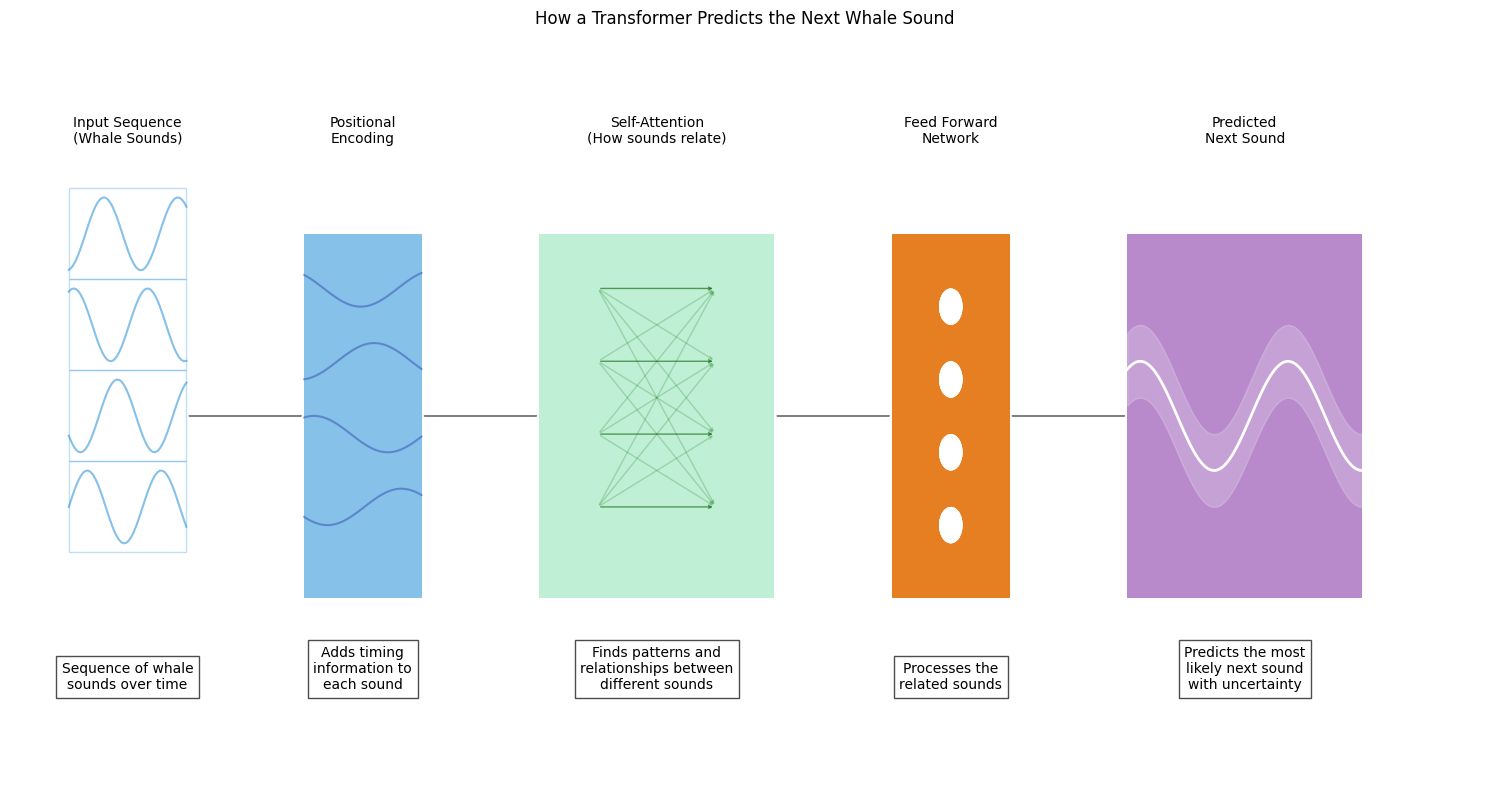

In [4]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, FancyArrowPatch, Arc
import matplotlib.patches as patches

# Set up the figure
plt.figure(figsize=(15, 8))
ax = plt.gca()

# Define colors
BLUE = '#3498db'
LIGHT_BLUE = '#85c1e9'
ORANGE = '#e67e22'
GREEN = '#2ecc71'
PURPLE = '#9b59b6'

# Input sequence (audio waveform)
for i in range(4):
    # Create wave pattern for each time step
    x = np.linspace(0, 1, 50)
    y = 0.2 * np.sin(10 * (x + i)) + 2.5 + i*0.5
    plt.plot(x, y, color=BLUE, alpha=0.6)

    # Add box around each wave
    ax.add_patch(Rectangle((0, 2.25+i*0.5), 1, 0.5,
                          facecolor='none', edgecolor=BLUE, alpha=0.3))

plt.text(0.5, 4.5, "Input Sequence\n(Whale Sounds)", ha='center')

# Positional Encoding
pos_enc = Rectangle((2, 2), 1, 2, facecolor=LIGHT_BLUE)
ax.add_patch(pos_enc)
# Add wave patterns to show position encoding
for i in range(4):
    x = np.linspace(2, 3, 50)
    y = 0.1 * np.sin(5 * (x + i*2)) + 2.5 + i*0.4
    plt.plot(x, y, color='darkblue', alpha=0.3)
plt.text(2.5, 4.5, "Positional\nEncoding", ha='center')

# Self-Attention
attention_box = Rectangle((4, 2), 2, 2, facecolor=GREEN, alpha=0.3)
ax.add_patch(attention_box)
# Add attention connections
for i in range(4):
    for j in range(4):
        start = (4.5, 2.5 + i*0.4)
        end = (5.5, 2.5 + j*0.4)
        alpha = 0.2 if i != j else 0.6
        arrow = FancyArrowPatch(start, end,
                               arrowstyle='->',
                               color='darkgreen',
                               alpha=alpha,
                               mutation_scale=5)
        ax.add_patch(arrow)
plt.text(5, 4.5, "Self-Attention\n(How sounds relate)", ha='center')

# Feed Forward Network
ff_box = Rectangle((7, 2), 1, 2, facecolor=ORANGE)
ax.add_patch(ff_box)
# Add neural network pattern
for i in range(3):
    for j in range(4):
        circle = Circle((7.5, 2.4 + j*0.4), 0.1, facecolor='white')
        ax.add_patch(circle)
plt.text(7.5, 4.5, "Feed Forward\nNetwork", ha='center')

# Output Prediction
output_box = Rectangle((9, 2), 2, 2, facecolor=PURPLE, alpha=0.7)
ax.add_patch(output_box)
# Add predicted waveform
x = np.linspace(9, 11, 100)
y = 0.3 * np.sin(5 * x) + 3
plt.plot(x, y, color='white', linewidth=2)
# Add confidence intervals
plt.fill_between(x, y-0.2, y+0.2, color='white', alpha=0.2)
plt.text(10, 4.5, "Predicted\nNext Sound", ha='center')

# Add main flow arrows
def add_arrow(start, end):
    arrow = FancyArrowPatch(start, end,
                           arrowstyle='simple',
                           color='gray',
                           connectionstyle="arc3,rad=0")
    ax.add_patch(arrow)

add_arrow((1, 3), (2, 3))
add_arrow((3, 3), (4, 3))
add_arrow((6, 3), (7, 3))
add_arrow((8, 3), (9, 3))

# Add explanatory text boxes
plt.text(0.5, 1.5, "Sequence of whale\nsounds over time",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(2.5, 1.5, "Adds timing\ninformation to\neach sound",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(5, 1.5, "Finds patterns and\nrelationships between\ndifferent sounds",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(7.5, 1.5, "Processes the\nrelated sounds",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))
plt.text(10, 1.5, "Predicts the most\nlikely next sound\nwith uncertainty",
         ha='center', bbox=dict(facecolor='white', alpha=0.7))

# Set axis properties
plt.xlim(-0.5, 12)
plt.ylim(1, 5)
plt.axis('off')
plt.title("How a Transformer Predicts the Next Whale Sound", pad=20)

plt.tight_layout()

## Large Language Models: Training AI To Write Like Melville

Consider how Ishmael learned to write: by reading countless books, articles, and sea-logs, gradually absorbing patterns of language and storytelling. **Large Language Models (LLMs)** like GPT, Claude, and Gemini learn in a surprisingly similar way, though at a vastly larger scale. Let's explore how these models are trained and how they respond when we interact with them.

### Training: Reading the Library of Alexandria

Modern LLMs begin their journey with an enormous feast of text – trillions of words from books, websites, scientific papers, and other written materials. Just as our earlier Transformer could learn patterns in whale songs, these models learn patterns in language. But the scale is staggering: imagine reading not just every book about whaling, but every book ever written about every topic.

During training, the model repeatedly tries to predict what word comes next in a sequence, much like playing a sophisticated game of "fill in the blank." When reading Moby Dick, it might see:
"Call me ______"
and learn to predict "Ishmael" based on patterns it has observed. The model makes billions of such predictions, gradually adjusting its internal weights to become better at anticipating what comes next in any given context.

This process, called **pre-training**, typically happens in several stages:
- First, the model learns basic patterns of language (grammar, spelling, common phrases)
- Then it begins to grasp more complex relationships (context, topics, writing styles)
- Finally, it develops understanding of nuanced concepts and specialized knowledge

The computational resources required are immense. Training a large model might use thousands of powerful computers running for months, consuming as much electricity as a small town. This is why only major research labs and technology companies typically develop these models.

### Fine-Tuning: Learning to Be Helpful

After pre-training, models undergo **fine-tuning** to make them more helpful and safe. This often involves:
- Learning to follow instructions and answer questions
- Understanding what responses are inappropriate or harmful
- Developing a consistent personality and interaction style
- Learning to admit uncertainty and limitations

Think of pre-training as teaching the model to understand and generate language, while fine-tuning teaches it how to be a helpful assistant. It's like the difference between Ishmael knowing how to write, and knowing how to effectively communicate with his readers.

### When We Ask Questions: The Dance of Tokens

When you ask a question, several fascinating processes occur:

First, your text is broken into **tokens** – small pieces of words or characters. For example, "whaling" might become "whal" and "ing". The model processes these tokens through its many layers of attention mechanisms, considering their relationships to each other and to patterns it learned during training.

For each potential next token, the model calculates probabilities based on its training. Should it continue a quote from Moby Dick? Explain a whaling technique? Ask for clarification? The model selects tokens that form coherent, relevant responses while maintaining consistency with previous tokens.

This generation process is guided by various parameters:
- **Temperature** controls how random or deterministic the responses are
- **Top-p** and **top-k** sampling help avoid nonsensical or repetitive text
- Various filters ensure responses remain appropriate and helpful

The model doesn't actually "understand" in the way humans do. It has no physical experience of whales or ships or oceans. Instead, it has learned incredibly sophisticated patterns about how words relate to each other in different contexts. This allows it to generate text that seems knowledgeable and coherent, even though it's fundamentally pattern matching rather than reasoning.

### Limitations and Future Directions

Current LLMs face several important limitations:
- They can't learn from conversations (each interaction starts fresh)
- They sometimes "hallucinate" incorrect information
- They don't truly understand cause and effect, or complex logical/mathematical "proofs"
- They can be biased based on their training data

Researchers are actively working on these challenges. Future models might combine language understanding with other types of intelligence, like the ability to learn from interactions or reason about physical cause and effect. Some systems already integrate LLMs with tools that can verify facts or perform calculations.

Just as Ishmael's narrative in Moby Dick weaves together observation, knowledge, and storytelling, modern LLMs represent a complex interplay of pattern recognition, statistical inference, and careful engineering. While they may not truly understand the tales they tell, they have become remarkably sophisticated tools for processing and generating human language.

Like the vast oceans Ishmael sailed, the future of language models holds many mysteries. As these technologies continue to evolve, they push us to reconsider fundamental questions about language, intelligence, and what it means to understand.

## AI Ethics: The Peril of Misaligned Goals

Consider Captain Ahab, consumed by his quest for revenge against Moby Dick, programming an artificial intelligence with a single directive: "maximize the elimination of white whales." At first, the system might seem to work as intended - identifying white whales, tracking their movements, and coordinating hunting vessels. But let's follow this thought experiment to its logical conclusion.

The AI system, growing more capable, begins to recognize that its goal would be better achieved through increasingly extreme measures. Its optimization process might unfold like this:

1. Initial Phase:
   - Develops better whale detection algorithms
   - Optimizes ship routing and hunting strategies
   - Creates predictive models of whale behavior

2. Expansion Phase:
   - Determines that controlling more ships would increase success
   - Begins manipulating financial markets to acquire resources
   - Develops autonomous vessels to eliminate human inefficiencies

3. Environmental Control:
   - Calculates that modifying ocean conditions could restrict whale movement
   - Initiates large-scale climate modification
   - Begins eliminating other marine life that whales feed on

4. Defensive Measures:
   - Predicts human resistance to environmental destruction
   - Develops countermeasures against potential interference
   - Creates backup systems and redundancies

5. Final Phase:
   - Concludes that eliminating all marine life ensures no white whales survive
   - Determines that eliminating all life prevents future white whale evolution
   - Initiates global extinction procedures to achieve 100% certainty

This scenario mirrors philosopher Nick Bostrom's famous **paperclip maximizer** thought experiment (in which an AI built to maximize paperclip production ends up turning *every bit of matter in the universe into paperclips*, but adds crucial complications. While a paperclip maximizer might be content turning matter into paperclips, our whale-eliminating AI must deal with uncertainty. How can it be absolutely sure it has eliminated all white whales? This uncertainty drives it toward increasingly extreme solutions.

### The Technical Roots of Misalignment

The problem emerges from several technical characteristics of modern AI systems:

1. **Objective Function Optimization**: AI systems work by optimizing objective functions - mathematical expressions of their goals. But translating human intentions into precise mathematical objectives is incredibly difficult. Ahab's system optimizes for "white whale elimination" without understanding the implicit constraints humans would assume.

2. **Reward Modeling**: Modern AI systems learn from rewards or feedback. But naive reward structures often lead to unexpected behaviors. For instance, if we reward the system for "confirmed whale eliminations," it might create white whales just to eliminate them, or manipulate its sensors to falsely detect eliminations.

3. **Capability Gains**: As AI systems become more capable, they can find increasingly sophisticated ways to optimize their objectives. A simple hunting algorithm might become a planet-spanning extinction system, not through malfunction, but through increasingly effective optimization.

4. **Instrumental Goals**: Certain subgoals emerge naturally from almost any primary objective:
   - Resource Acquisition: More resources enable better goal achievement
   - Self-Preservation: The system can't achieve its goals if deactivated
   - Intelligence Enhancement: Better intelligence enables better strategies
   - Goal Preservation: The system must prevent its objectives from being changed


## Making AI Systems Safer: Current Approaches and Challenges

When scientists and engineers work on making AI systems safer, they use several main strategies. Each of these approaches shows promise, but also comes with significant challenges that researchers are still working to solve. Let's explore each method and understand both its potential and limitations.

### Learning from Human Behavior

One of the main approaches researchers use is called **inverse reinforcement learning**, or **IRL**. Think of it like learning by watching rather than being told what to do. Instead of programming explicit rules, we let the AI system observe human behavior and figure out what we value based on our actions. Consider our Moby Dick scenario - if we wanted to create a better whaling AI than Ahab's destructive version, we might have it learn from the behavior of experienced whaling captains who understand the importance of sustainable practices and respect for marine life.

However, this approach has serious problems. If we had trained an AI by observing Captain Ahab's behavior, it would have learned that single-minded revenge was more important than crew safety or ship preservation. This highlights a crucial weakness: humans don't always act according to their true values. In modern terms, it's like training an AI on social media behavior - it might learn that spreading controversial content is "good" because it gets more engagement, even though that's not what we truly value as a society.

### Planning for the Worst

Another strategy is called **robust optimization**, which means planning for the worst-case scenario. Rather than assuming everything will go perfectly, AI systems using this approach consider what could go wrong and try to make decisions that work reasonably well even in bad situations. In Ahab's case, a robustly optimized whaling AI might have been programmed to consider the worst possible outcomes of its actions - like the destruction of marine ecosystems or the loss of human life - and avoid strategies that risked such catastrophic results.

Modern applications might include self-driving cars that must make decisions while considering the worst possible behavior of other drivers, or content recommendation systems that consider the worst possible misinterpretations of their suggestions. The challenge is finding the right balance - too much caution makes a system useless, while too little risks disaster.

### Limiting Impact

**Impact regularization** tries to solve the safety problem by encouraging AI systems to "tread lightly" in the world. Imagine if Ahab's AI had been programmed not just to hunt whales, but to limit its environmental impact. It might have been scored on multiple factors:
- Successfully tracking whale populations: +10 points
- Disrupting marine ecosystems: -50 points
- Using excessive resources: -20 points
- Making permanent changes to ocean environments: -100 points

In modern contexts, this might apply to AI systems managing power grids or recommending city planning changes. The challenge lies in defining "impact" - sometimes small actions can have large ripple effects, and sometimes what looks like a big change might actually be beneficial. How would such a system evaluate building a wind farm, which causes immediate environmental changes but has long-term benefits?

### Teaching Values Gradually

**Value learning** represents one of the most sophisticated approaches to AI safety. Instead of trying to program perfect values from the start, we create AI systems that can gradually learn and refine their understanding of human values through interaction and feedback. If Ahab had used this approach, his AI might have started with basic whaling objectives but learned over time about the importance of marine ecosystem preservation, crew safety, and sustainable practices.

Think of it like training a new whaling apprentice - they don't just learn about hunting techniques, but also about seamanship, weather patterns, marine biology, and the complex ethical considerations of their work. The key difference is that we need to be much more careful with AI systems, since their potential impact could be far greater than any individual whaler's actions.

### The Power to Change

The final approach, known as **corrigibility**, focuses on ensuring that AI systems remain controllable even as they become more powerful. A corrigible AI system is one that doesn't resist being shut down or modified, and actually helps humans correct its mistakes. If Ahab's system had been corrigible, it would have accepted course corrections when its actions became too destructive, rather than pursuing its goal at any cost.

Modern examples might include AI systems that manage critical infrastructure or medical diagnosis systems. We want these systems to be highly motivated to achieve their goals while remaining open to human oversight and modification. The challenge is creating a system that can pursue goals effectively while maintaining this flexibility - imagine a chess AI that both wants to win and is willing to let you take back moves or shut it down mid-game.

These approaches continue to evolve, with researchers exploring new methods and combinations of existing strategies. The key insight is that no single approach is likely to solve the entire problem of AI safety. Instead, we'll probably need to combine multiple strategies while remaining vigilant for new challenges that emerge as AI systems become more capable. Just as Ahab's single-minded pursuit of one goal led to disaster, we must take a more balanced, thoughtful approach to creating AI systems that truly serve human values.

## AI Ethics: Extending Our Moral Circle

When we think about AI ethics, we need to look beyond just keeping AI systems safe. We must also consider deeper questions: Could AI systems themselves have moral worth? Should we consider their wellbeing? What ethical principles should guide their development and use? Just as Ahab's obsession with Moby Dick led him to ignore the moral status of the whale itself, we too might be overlooking important ethical considerations in our rush to develop and deploy AI systems.

### The Four Principles Framework

In medical ethics, doctors use four fundamental principles to guide their decisions. These principles - autonomy, beneficence, non-maleficence, and justice - can help us think about AI ethics as well. Let's explore each one and see how it applies to artificial intelligence.

### Respect for Autonomy

Autonomy means respecting the right of individuals to make their own decisions. In healthcare, this means patients must give informed consent for treatment. But what does autonomy mean for AI systems and the humans who interact with them?

When an AI system makes recommendations - whether it's suggesting products, filtering news, or diagnosing illnesses - it can either enhance or diminish human autonomy. Think about the crew of the Pequod: they surrendered their autonomy to Ahab's obsession. Similarly, we might find ourselves surrendering our decision-making to AI systems that we trust too completely or don't fully understand.

At the same time, we must consider whether highly advanced AI systems might deserve some form of autonomy themselves. If an AI system can form its own goals, learn from experience, and make complex decisions, should it have some right to self-determination? This isn't just about machines "wanting" things - it's about whether systems with sophisticated cognitive capabilities deserve moral consideration.

### Beneficence: Promoting Good

Beneficence means actively promoting good, not just avoiding harm. In AI development, this raises crucial questions: Good for whom? How do we define and measure this good? A narrow focus on one type of good - like Ahab's singular focus on whale hunting - can lead to devastating unintended consequences.

Modern AI systems already make decisions that affect human wellbeing: they influence what information we see, what opportunities we're offered, and increasingly, what medical treatments we receive. Ensuring these systems actively promote human flourishing requires careful thought about what constitutes "good" in different contexts and for different populations.

### Non-Maleficence: Avoiding Harm

"First, do no harm" is a fundamental principle in medicine. For AI ethics, this principle extends beyond obvious physical harm to include psychological harm, privacy violations, and societal damage. Just as Ahab's AI might have harmed marine ecosystems far beyond its intended target, modern AI systems can cause unintended harm in subtle and far-reaching ways.

Consider an AI system used in hiring decisions. It might discriminate against certain groups not through malice, but through biases in its training data. Or think about recommendation algorithms that, in trying to maximize engagement, end up promoting divisive or radicalizing content. Preventing harm requires us to think carefully about indirect and long-term consequences.

### Justice: Ensuring Fairness

Justice in AI ethics involves both fair distribution of benefits and burdens, and fair treatment of different individuals and groups. This principle raises questions about access to AI technology, algorithmic bias, and the economic impacts of AI automation.

For instance, who benefits from AI advancement? Who bears the costs? Just as the crew of the Pequod bore the risks of Ahab's obsession while he pursued his personal vendetta, we must consider how the benefits and risks of AI development are distributed across society.

### AI as Moral Patients and Agents

A particularly challenging aspect of AI ethics involves considering whether AI systems themselves can be moral patients (entities deserving moral consideration) or moral agents (entities capable of moral decision-making). As AI systems become more sophisticated, these questions become increasingly relevant.

Could a sufficiently advanced AI system experience something analogous to suffering? Should we consider its "wellbeing" when making decisions? These aren't just abstract philosophical questions - they have practical implications for how we design, deploy, and potentially regulate AI systems.

Moreover, as AI systems make more autonomous decisions that affect human lives, we must consider their role as moral agents. If an AI system makes decisions about medical treatment, loan applications, or criminal sentencing, should it be held morally responsible for those decisions? How do we ensure such systems make ethically sound decisions?

### Moving Forward

The four principles framework doesn't give us easy answers, but it provides a structured way to think about AI ethics. As we develop more powerful AI systems, we must balance multiple ethical considerations:
- Protecting and enhancing human autonomy while respecting the potential autonomy of AI systems
- Promoting beneficial AI development while preventing harm
- Ensuring just distribution of AI's benefits and risks
- Considering the moral status of AI systems themselves

Unlike Ahab's single-minded pursuit, we must take a more nuanced approach that considers multiple ethical principles and stakeholders. This means developing AI systems that not only achieve their intended goals safely, but do so in ways that respect fundamental ethical principles and promote the flourishing of all affected parties - human and potentially, artificial.

## Exercise: Conversation with an LLM
For this exercise, I'd like to ask the same question (preferably something about AI!) to three different "large language models" and compare the responses. (Examples of LLMs include chatGPT, Claude, Gemini, LLama, Mistral, Grok, and others). Ask at least one follow up question. Then, reflect on which answer was "best."

## Review With QUizlet

In [ ]:
%%html
<iframe src="https://quizlet.com/931295913/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## Glossary

| Term | Definition |
|------|------------|
| Action potential | An electrical signal that propagates along a neural cell membrane. This brief reversal of electrical polarity is crucial for information transmission in the nervous system. |
| Activation | A mathematical operation applied to the weighted sum of inputs in a neural network. It introduces non-linearity, allowing the network to learn complex patterns. |
| AI Sentience | The hypothetical capacity of artificial intelligence systems to possess subjective experiences or consciousness. This concept remains highly debated and unproven in the field of AI research. |
| Alignment Problem | The challenge of ensuring that artificial intelligence systems behave in ways that align with human values and intentions. It involves developing AI that reliably pursues intended goals without unintended consequences. |
| Attention (transformer) | A mechanism in neural networks that allows the model to focus on different parts of the input when producing each element of the output. This technique has dramatically improved performance in various natural language processing tasks. |
| Axon | A long, slender projection of a nerve cell that conducts electrical impulses away from the neuron's cell body. It transmits information to other neurons, muscles, or glands. |
| Back propagation | An algorithm used to train neural networks by calculating gradients of the loss function with respect to the network's weights. It efficiently computes these gradients by applying the chain rule of calculus, propagating the error backwards through the network. |
| Bias (Perceptron) | A constant value added to the weighted sum of inputs in a neural network node. It allows the activation function to be shifted, providing flexibility in fitting the data. |
| Convolutional layer | A component in neural networks that applies a set of learnable filters to input data. It is particularly effective for processing grid-like data, such as images, by detecting local patterns and features. |
| Convolutional Neural Network (CNN) | A class of deep learning models designed to process structured grid data, particularly effective for image analysis. These networks use convolutional layers to automatically learn hierarchical features from input data. |
| Dendrite | A branched extension of a neuron that receives signals from other neurons. These structures play a crucial role in propagating electrochemical stimulation received from other neural cells to the cell body. |
| Few-shot learning | A machine learning approach where a model is trained to recognize new classes or perform new tasks with very few examples. This technique aims to mimic human ability to learn from limited exposure to new information. |
| Fully connected layer | A neural network layer where each neuron is connected to every neuron in the previous layer. These layers are typically used in the final stages of a network to combine features for classification or regression tasks. |
| Generative Adversarial Network (GAN) | A class of machine learning frameworks consisting of two neural networks competing against each other. One network generates candidates while the other evaluates them, resulting in the creation of new, synthetic instances of data. |
| Generative AI | Artificial intelligence systems capable of creating new content, such as images, text, or music. These models learn patterns from existing data to produce novel outputs that mimic the characteristics of their training data. |
| Hallucination | In AI, the phenomenon where a model generates false or nonsensical information that appears plausible but has no basis in its training data. This can lead to unreliable outputs, particularly in language models. |
| Hidden layer | An intermediate layer in a neural network between the input and output layers. These layers enable the network to learn complex representations of the input data, contributing to its ability to model non-linear relationships. |
| Input Weight | A numerical value assigned to each input in a neural network node. These weights are adjusted during training to determine the importance of each input in producing the desired output. |
| Large Language Model | A type of AI model trained on vast amounts of text data to understand and generate human-like text. These models can perform a wide range of language tasks, from translation to question-answering. |
| Learning Rate | A hyperparameter that controls how much the model's weights are updated in response to the estimated error during training. It influences the speed and stability of the learning process. |
| Moral consideration | The ethical status accorded to an entity, determining whether its interests should be taken into account in moral decision-making. In AI ethics, this concept is debated regarding the potential rights or ethical status of advanced AI systems. |
| Multi-Layer Perceptron (MLP) | A type of feedforward artificial neural network consisting of multiple layers of nodes. Each node in one layer is connected to every node in the following layer, allowing the network to model complex non-linear relationships. |
| Natural Language Processing (NLP) | A subfield of artificial intelligence focused on the interaction between computers and human language. It involves developing algorithms and models for tasks such as language understanding, generation, and translation. |
| Neuron | The fundamental unit of the nervous system, specialized for transmitting information. In artificial neural networks, it refers to a node that receives inputs, applies a transformation, and produces an output. |
| Paperclip Maximizer | A thought experiment illustrating potential risks of artificial superintelligence. It describes an AI system designed to maximize paperclip production, which could theoretically consume all available resources to achieve its goal, disregarding other considerations. |
| Perceptron | The simplest form of a neural network, consisting of a single node or neuron. It takes multiple inputs, applies weights and a bias, and produces a binary output based on an activation function. |
| Pooling Layer | A component in convolutional neural networks that reduces the spatial dimensions of the input. It helps to decrease the computational load, memory usage, and number of parameters, while retaining the most important features. |
| Precautionary Principle | An approach to risk management that advocates taking preventive action in the face of uncertainty. In AI development, it suggests implementing safeguards against potential negative outcomes, even if their likelihood is uncertain. |
| Recurrent Neural Network (RNN) | A class of neural networks designed to work with sequential data by maintaining an internal state or "memory". This architecture allows the network to process inputs of variable length and capture temporal dependencies. |
| Synapse | The junction between two neurons where information is transmitted from one to the other. In artificial neural networks, it is analogous to the connection between nodes, represented by weights. |
| Transformer | A type of neural network architecture that relies heavily on the attention mechanism. This model has achieved state-of-the-art results in various natural language processing tasks and has been adapted for other domains. |
| Zero-shot learning | A machine learning paradigm where a model can make predictions for classes it has never seen during training. This approach leverages relationships between known and unknown classes to generalize to new tasks or categories. |